In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
os.chdir('C:\\Users\\mcoge\\Satellite project')

In [3]:
os.listdir()

['bubble_lat_long.xlsx',
 'budget.xlsx',
 'budget_cleaned.csv',
 'budget_lat_lon.csv',
 'satellites.xlsx',
 'satellites_cleaned.csv',
 'Screenshot_2021-01-16 TR Dashboard - mattcoget gmail com - Gmail.png']

In [4]:
budget=pd.read_csv('budget_cleaned.csv')
budget.head()

,application,year,value,region,country_code,country,program_type,program_name
0,Total,2019,220.230630,Europe,BEL,Belgium,Civil,ESA
1,Total,2020,193.374633,Europe,BEL,Belgium,Civil,ESA
2,Total,2019,61.161734,Europe,AUT,Austria,Civil,ESA
3,Total,2020,50.245259,Europe,AUT,Austria,Civil,ESA
4,Total,2019,1.513415,Europe,BGR,Bulgaria,Civil,ESA


In [5]:
budget[budget.country_code=='USA']

,application,year,value,region,country_code,country,program_type,program_name
8767,Telecommunications,1999,97.000,NORAM,USA,United States,Civil,National program
8768,Earth Observation,1999,1414.000,NORAM,USA,United States,Civil,National program
8769,Space Science and exploration,1999,1967.000,NORAM,USA,United States,Civil,National program
8770,Human Spaceflight,1999,8041.000,NORAM,USA,United States,Civil,National program
8771,Other,1999,940.000,NORAM,USA,United States,Civil,National program
...,...,...,...,...,...,...,...,...
9151,Meteorology,2020,329.119,NORAM,USA,United States,Defence,National program
9152,Technology,2020,2056.072,NORAM,USA,United States,Defence,National program
9153,Launch vehicles,2020,1836.804,NORAM,USA,United States,Defence,National program
9154,Space security,2020,725.491,NORAM,USA,United States,Defence,National program


In [6]:
satellites=pd.read_csv('satellites_cleaned.csv')
satellites.head()

,satellite_Name,Launch year,Launch status,Application,operator_status,country,region,mass_range_kg,price_range_m$
0,DMC-3A,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
1,DMC-3B,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
2,DMC-3C,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
3,SSTL-S1,2018,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
4,VRSS-1,2012,Launched,Earth Observation,Civil,"Venezuela, RB",Latin America and Caribbean,501-2000 kg,51-200M$


**Modelling :**
* Budget per countries for 2021-2030
* Budget for Civil/Defence
* 

In [128]:
satellites['Launch year'].max()

2028

In [129]:
satellites['Launch year'].min()

2009

In [7]:
satellites_us=satellites[satellites.country=='United States']

In [8]:
satellites_us.sort_values(by='Launch year',ascending=True, inplace=True)

<ipython-input-8-0dea5d211e5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satellites_us.sort_values(by='Launch year',ascending=True, inplace=True)


In [9]:
satellites_us[satellites_us['Launch status']=='To be launched']

,satellite_Name,Launch year,Launch status,Application,operator_status,country,region,mass_range_kg,price_range_m$
1404,JWST,2021,To be launched,Science,Civil,United States,North America,>5000 kg,>500 M$
1447,DART,2021,To be launched,Exploration,Civil,United States,North America,<500 kg,>500 M$
2252,SHARP 2,2021,To be launched,Security,Defense,United States,North America,2001-5000 kg,>500 M$
2237,AEHF-6,2021,To be launched,Telecom,Defense,United States,North America,>5000 kg,>500 M$
1434,IXPE (SMEX 14),2021,To be launched,Science,Civil,United States,North America,<500 kg,51-200M$
...,...,...,...,...,...,...,...,...,...
2350,Small military mission,2028,To be launched,Earth Observation,Defense,United States,North America,<500 kg,51-200M$
2351,Small military mission,2028,To be launched,Earth Observation,Defense,United States,North America,<500 kg,51-200M$
2352,Small military mission,2028,To be launched,Earth Observation,Defense,United States,North America,<500 kg,51-200M$
2278,NG-OPIR-Polar 2,2028,To be launched,Security,Defense,United States,North America,501-2000 kg,201-500 M$


In [10]:
satellites.country.value_counts()

China                 857
Russian Federation    472
United States         412
India                 105
European Union        100
                     ... 
Armenia                 1
Slovenia                1
Cameroon                1
Iraq                    1
Ecuador                 1
Name: country, Length: 76, dtype: int64

In [11]:
satellites_us['Launch year'].value_counts()

2026    39
2022    34
2027    29
2025    27
2023    27
2024    23
2021    23
2018    22
2009    22
2028    19
2020    18
2011    18
2014    17
2015    16
2013    15
2019    14
2012    13
2010    13
2017    12
2016    11
Name: Launch year, dtype: int64

**Next steps:**
1. 
2. 
3. 
4. 

In [12]:
satellites_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 1382 to 1453
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   satellite_Name   412 non-null    object
 1   Launch year      412 non-null    int64 
 2   Launch status    412 non-null    object
 3   Application      412 non-null    object
 4   operator_status  412 non-null    object
 5   country          412 non-null    object
 6   region           412 non-null    object
 7   mass_range_kg    412 non-null    object
 8   price_range_m$   412 non-null    object
dtypes: int64(1), object(8)
memory usage: 32.2+ KB


In [13]:
satellites_us.head()

,satellite_Name,Launch year,Launch status,Application,operator_status,country,region,mass_range_kg,price_range_m$
1382,OCO-1,2009,Launch failure,Earth Observation,Civil,United States,North America,<500 kg,201-500 M$
2192,WGS-2,2009,Launched,Telecom,Defense,United States,North America,>5000 kg,>500 M$
2191,STSS ATRR (Space Tracking and surveillance sys...,2009,Launched,Technology,Defense,United States,North America,<500 kg,51-200M$
2190,STSS 2,2009,Launched,Security,Defense,United States,North America,501-2000 kg,201-500 M$
2189,STSS 1,2009,Launched,Security,Defense,United States,North America,501-2000 kg,201-500 M$


In [14]:
satellites_us.mass_range_kg.value_counts()

<500 kg         161
2001-5000 kg    110
>5000 kg         71
501-2000 kg      70
Name: mass_range_kg, dtype: int64

In [15]:
satellites_us.columns

Index(['satellite_Name', 'Launch year', 'Launch status', 'Application',
       'operator_status', 'country', 'region', 'mass_range_kg',
       'price_range_m$'],
      dtype='object')

In [16]:
satellites_us.rename({'mass_range_kg':'mass', 'price_range_m$':'price'}, axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
df_dummies=pd.get_dummies(data=satellites_us, columns=['mass','price'],drop_first=False)

In [18]:
df_dummies.head()

,satellite_Name,Launch year,Launch status,Application,operator_status,country,region,mass_2001-5000 kg,mass_501-2000 kg,mass_<500 kg,mass_>5000 kg,price_201-500 M$,price_51-200M$,price_<50 M$,price_>500 M$,price_TBD
1382,OCO-1,2009,Launch failure,Earth Observation,Civil,United States,North America,0,0,1,0,1,0,0,0,0
2192,WGS-2,2009,Launched,Telecom,Defense,United States,North America,0,0,0,1,0,0,0,1,0
2191,STSS ATRR (Space Tracking and surveillance sys...,2009,Launched,Technology,Defense,United States,North America,0,0,1,0,0,1,0,0,0
2190,STSS 2,2009,Launched,Security,Defense,United States,North America,0,1,0,0,1,0,0,0,0
2189,STSS 1,2009,Launched,Security,Defense,United States,North America,0,1,0,0,1,0,0,0,0


In [19]:
df_group=df_dummies.groupby(['country','Launch year','Application']).sum()

In [20]:
df_group.columns

Index(['mass_2001-5000 kg', 'mass_501-2000 kg', 'mass_<500 kg',
       'mass_>5000 kg', 'price_201-500 M$', 'price_51-200M$', 'price_<50 M$',
       'price_>500 M$', 'price_TBD'],
      dtype='object')

In [21]:
df_group.describe().T

,count,mean,std,min,25%,50%,75%,max
mass_2001-5000 kg,136.0,0.808824,1.145133,0.0,0.0,0.0,1.00,7.0
mass_501-2000 kg,136.0,0.514706,0.860536,0.0,0.0,0.0,1.00,5.0
mass_<500 kg,136.0,1.183824,2.870546,0.0,0.0,0.0,1.00,21.0
mass_>5000 kg,136.0,0.522059,0.797839,0.0,0.0,0.0,1.00,4.0
price_201-500 M$,136.0,0.757353,1.014680,0.0,0.0,0.0,1.00,5.0
price_51-200M$,136.0,0.507353,1.360808,0.0,0.0,0.0,0.25,10.0
price_<50 M$,136.0,0.705882,2.328941,0.0,0.0,0.0,0.00,18.0
price_>500 M$,136.0,0.911765,1.189277,0.0,0.0,1.0,1.00,7.0
price_TBD,136.0,0.147059,0.523937,0.0,0.0,0.0,0.00,3.0


In [22]:
df_group.reset_index(inplace=True)

In [23]:
df_group

,country,Launch year,Application,mass_2001-5000 kg,mass_501-2000 kg,mass_<500 kg,mass_>5000 kg,price_201-500 M$,price_51-200M$,price_<50 M$,price_>500 M$,price_TBD
0,United States,2009,Earth Observation,2,1,2,0,2,1,0,2,0
1,United States,2009,Exploration,0,2,0,0,2,0,0,0,0
2,United States,2009,Manned spaceflight,1,0,0,2,0,0,0,0,3
3,United States,2009,Navigation,2,0,0,0,2,0,0,0,0
4,United States,2009,Science,0,2,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
131,United States,2028,Exploration,0,1,0,0,1,0,0,0,0
132,United States,2028,Manned spaceflight,0,0,0,1,0,0,0,0,1
133,United States,2028,Navigation,2,0,0,0,2,0,0,0,0
134,United States,2028,Security,0,2,0,1,2,0,0,1,0


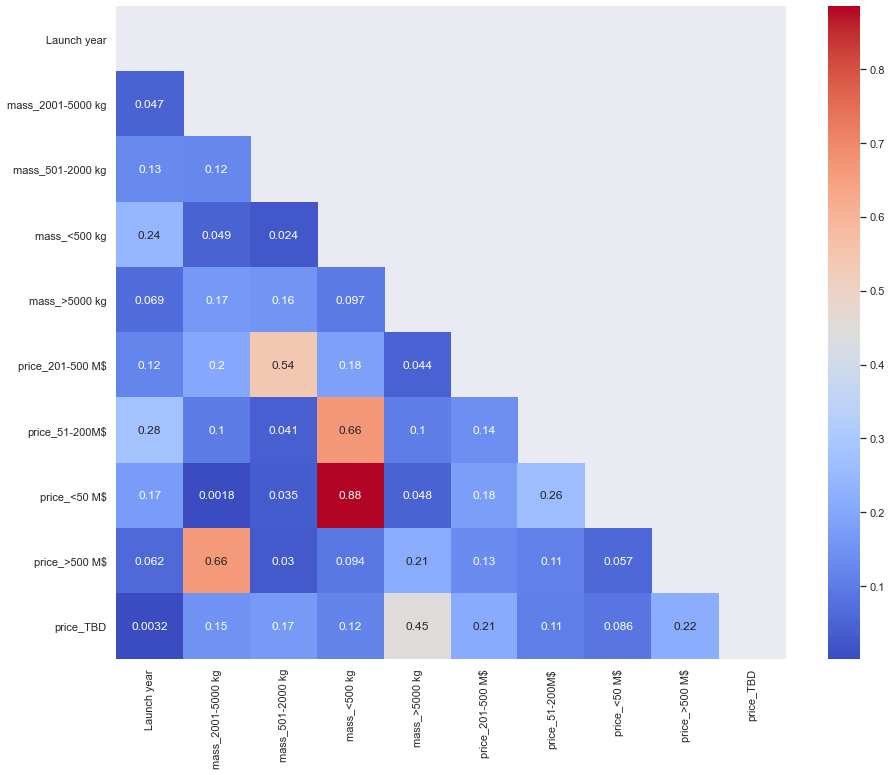

In [24]:
corr_matrix = df_group.corr().abs()
plt.figure(figsize=(15, 12))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap= 'coolwarm',
            mask=mask)
plt.show()

In [25]:
budget_us=budget[budget.country=='United States']

In [26]:
budget_us=budget_us.groupby(['country', 'year', 'application']).sum().reset_index()

In [27]:
budget_us

,country,year,application,value
0,United States,1999,Early warning,851.480
1,United States,1999,Earth Observation,1476.830
2,United States,1999,Human Spaceflight,8041.000
3,United States,1999,Internal operations,1388.823
4,United States,1999,Launch vehicles,1226.330
...,...,...,...,...
281,United States,2020,Space Science and exploration,4524.000
282,United States,2020,Space security,725.491
283,United States,2020,Technology,3070.372
284,United States,2020,Telecommunications,1419.938


<AxesSubplot:xlabel='value'>

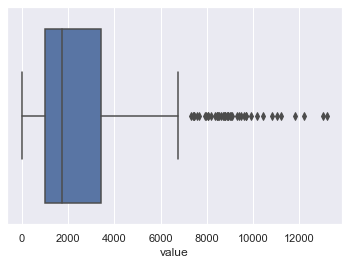

In [28]:
sns.boxplot(budget_us.value)

In [29]:
df_group.columns

Index(['country', 'Launch year', 'Application', 'mass_2001-5000 kg',
       'mass_501-2000 kg', 'mass_<500 kg', 'mass_>5000 kg', 'price_201-500 M$',
       'price_51-200M$', 'price_<50 M$', 'price_>500 M$', 'price_TBD'],
      dtype='object')

<AxesSubplot:>

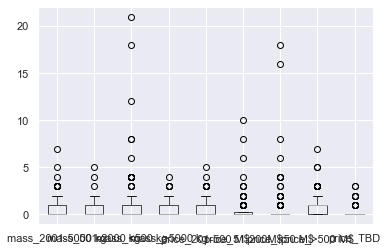

In [30]:
df_group.boxplot(['mass_2001-5000 kg',
       'mass_501-2000 kg', 'mass_<500 kg', 'mass_>5000 kg', 'price_201-500 M$',
       'price_51-200M$', 'price_<50 M$', 'price_>500 M$', 'price_TBD'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='price_TBD'>

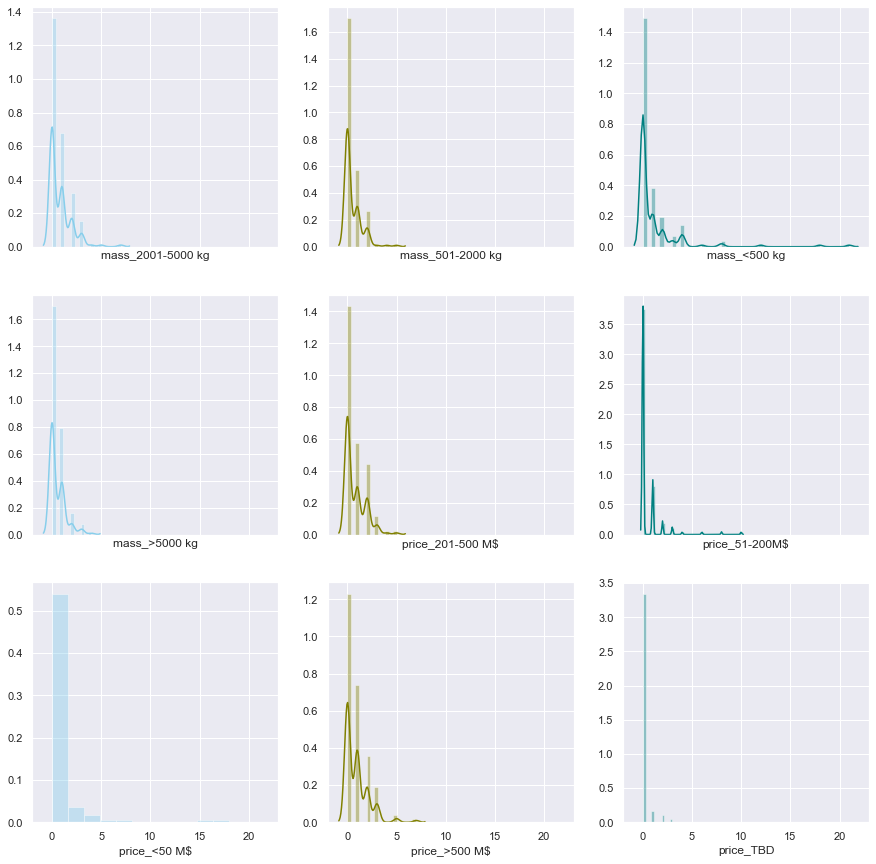

In [31]:
# plot
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True)
sns.distplot(df_group['mass_2001-5000 kg'] , color="skyblue", ax=axes[0,0])
sns.distplot(df_group['mass_501-2000 kg'] , color="olive", ax=axes[0,1])
sns.distplot(df_group['mass_<500 kg'] , color="teal", ax=axes[0,2])
sns.distplot(df_group['mass_>5000 kg'] , color="skyblue", ax=axes[1,0])
sns.distplot(df_group['price_201-500 M$'] , color="olive", ax=axes[1,1])
sns.distplot(df_group['price_51-200M$'] , color="teal", ax=axes[1,2])
sns.distplot(df_group['price_<50 M$'] , color="skyblue", ax=axes[2,0])
sns.distplot(df_group['price_>500 M$'] , color="olive", ax=axes[2,1])
sns.distplot(df_group['price_TBD'] , color="teal", ax=axes[2,2])

**Process**
1. For loop for every single country
2. Data processing
3. Go into models
    * Linear
    * SVR with cubic
    


In [33]:
budget.dtypes

application      object
year              int64
value           float64
region           object
country_code     object
country          object
program_type     object
program_name     object
dtype: object

In [34]:
budget.year

0       2019
1       2020
2       2019
3       2020
4       2019
        ... 
9505    2020
9506    2020
9507    2020
9508    2020
9509    2020
Name: year, Length: 9510, dtype: int64

In [35]:
budget['year_corrected']=budget.year-1999

In [36]:
budget

,application,year,value,region,country_code,country,program_type,program_name,year_corrected
0,Total,2019,220.230630,Europe,BEL,Belgium,Civil,ESA,20
1,Total,2020,193.374633,Europe,BEL,Belgium,Civil,ESA,21
2,Total,2019,61.161734,Europe,AUT,Austria,Civil,ESA,20
3,Total,2020,50.245259,Europe,AUT,Austria,Civil,ESA,21
4,Total,2019,1.513415,Europe,BGR,Bulgaria,Civil,ESA,20
...,...,...,...,...,...,...,...,...,...
9505,Meteorology,2020,285.760864,Europe,EUM,Eumetsat,Civil,National program,21
9506,Meteorology,2020,153.914576,Europe,EUM,Eumetsat,Civil,National program,21
9507,Meteorology,2020,0.676135,Europe,EUM,Eumetsat,Civil,National program,21
9508,Meteorology,2020,28.923545,Europe,EUM,Eumetsat,Civil,National program,21


In [37]:
budget.sort_values(by='year', inplace = True)
budget.head()

,application,year,value,region,country_code,country,program_type,program_name,year_corrected
923,Navigation,1999,5.612717,Europe,DEU,Germany,Civil,ESA,0
8944,Space security,1999,35.000000,NORAM,USA,United States,Defence,National program,0
8943,Launch vehicles,1999,1226.330000,NORAM,USA,United States,Defence,National program,0
8942,Technology,1999,800.000000,NORAM,USA,United States,Defence,National program,0
8941,Meteorology,1999,143.717000,NORAM,USA,United States,Defence,National program,0


In [38]:
budget.drop(['application', 'year', 'region', 'country_code', 'program_name'], axis=1, inplace=True)

In [39]:
budget_grouped=budget.groupby(['country','program_type','year_corrected']).sum().reset_index()

In [393]:
budget_grouped.query('program_type=="Civil"').country.value_counts()[1-0:]

Switzerland      22
Germany          22
Eumetsat         22
Ireland          22
United States    22
                 ..
Zimbabwe          3
Uzbekistan        3
Chile             2
Kenya             2
Myanmar           2
Name: country, Length: 77, dtype: int64

In [394]:
budget_grouped.query('program_type=="Defence"').country.value_counts()[10:]

Spain                   19
Israel                  18
Canada                  18
United Arab Emirates    14
Norway                  13
India                   13
Peru                    13
Turkey                  12
Kenya                   12
Denmark                  9
Morocco                  9
Netherlands              9
New Zealand              9
Greece                   9
Luxembourg               9
Indonesia                9
Nigeria                  7
Brazil                   7
Belgium                  7
Colombia                 6
Ecuador                  6
Qatar                    6
Egypt, Arab Rep.         5
Singapore                3
Korea, Rep.              3
Thailand                 2
Name: country, dtype: int64

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# France
## Civil

### Select the X and y

In [373]:
df_ml=budget_grouped.query('country=="France" & program_type=="Civil"').reset_index()
df_ml.head()

,index,country,program_type,year_corrected,value
0,565,France,Civil,0,1929.519384
1,566,France,Civil,1,1600.302503
2,567,France,Civil,2,1485.321200
3,568,France,Civil,3,1590.014418
4,569,France,Civil,4,1815.167364


In [374]:
X,y = df_ml[['year_corrected']], df_ml.value

### Linear Regression

In [375]:
lm=LinearRegression()
lm.fit(X, y)
y_pred1 = lm.predict(X)
lm.score(X,y)

0.6662903191841463

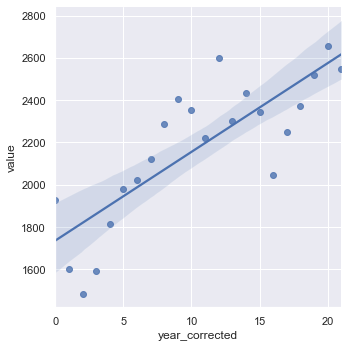

In [377]:
sns_plot=sns.lmplot(data=df_ml, x='year_corrected', y='value')
sns_plot.savefig('france linear.png', dpi=300)

In [378]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr.fit(X, y)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

0.5079226431567911


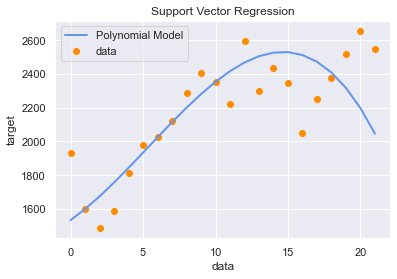

In [379]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.savefig('france svr.jpg', dpi=300)
plt.show()

## Defence

In [380]:
df_ml2=budget_grouped.query('country=="France" & program_type=="Defence"').reset_index()
df_ml2.head()

,index,country,program_type,year_corrected,value
0,587,France,Defence,0,439.509240
1,588,France,Defence,1,323.722000
2,589,France,Defence,2,372.944000
3,590,France,Defence,3,421.626424
4,591,France,Defence,4,492.080439


In [381]:
X,y = df_ml2[['year_corrected']], df_ml2.value

In [382]:
lm=LinearRegression()
lm.fit(X, y)
lm.score(X,y)

0.29479757059691525

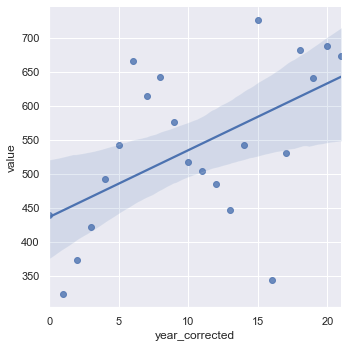

In [383]:
sns.lmplot(data=df_ml2, x='year_corrected', y='value')
sns_plot.savefig('france linear defence.png', dpi=300)

In [384]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr.fit(X, y)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

-0.2976536059104209


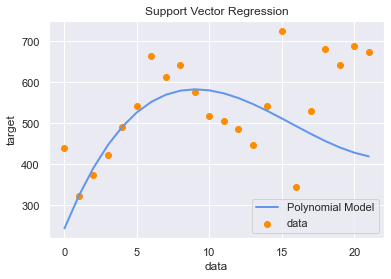

In [385]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.savefig('france svr defence.jpg', dpi=300)
plt.show()

# Germany
## Civil

### Select the X and y

In [256]:
df_ml=budget_grouped.query('country=="Germany" & program_type=="Civil"').reset_index()
df_ml.head()

,index,country,program_type,year_corrected,value
0,614,Germany,Civil,0,780.957184
1,615,Germany,Civil,1,685.466222
2,616,Germany,Civil,2,844.794676
3,617,Germany,Civil,3,920.425542
4,618,Germany,Civil,4,1125.238986


In [257]:
X,y = df_ml[['year_corrected']], df_ml.value

### Linear Regression

In [258]:
lm=LinearRegression()
lm.fit(X, y)
y_pred1 = lm.predict(X)
lm.score(X,y)

0.8744416931941603

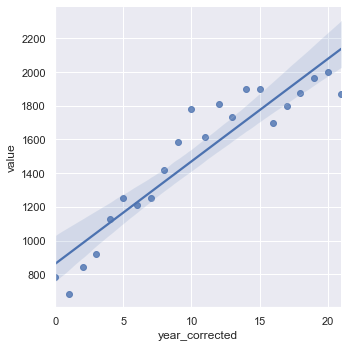

In [259]:
sns.lmplot(data=df_ml, x='year_corrected', y='value')

In [260]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr.fit(X, y)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

0.8691961722424135


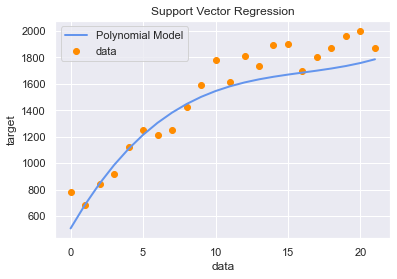

In [261]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

## Defence

In [262]:
df_ml2=budget_grouped.query('country=="Germany" & program_type=="Defence"').reset_index()
df_ml2.head()

,index,country,program_type,year_corrected,value
0,636,Germany,Defence,3,18.822608
1,637,Germany,Defence,4,22.572497
2,638,Germany,Defence,5,24.833461
3,639,Germany,Defence,6,24.871910
4,640,Germany,Defence,7,25.089664


In [263]:
X,y = df_ml2[['year_corrected']], df_ml2.value

In [264]:
lm=LinearRegression()
lm.fit(X, y)
lm.score(X,y)

0.3444595903856751

In [265]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr.fit(X, y)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

-1.831671986650281


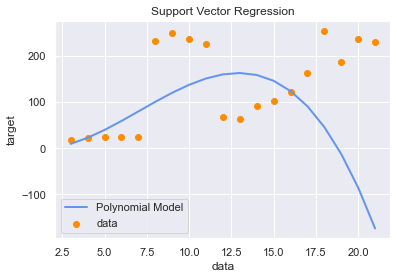

In [266]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

# UK
## Civil

### Select the X and y

In [267]:
df_ml=budget_grouped.query('country=="United Kingdom" & program_type=="Civil"').reset_index()
df_ml.head()

,index,country,program_type,year_corrected,value
0,1682,United Kingdom,Civil,0,341.716055
1,1683,United Kingdom,Civil,1,299.274811
2,1684,United Kingdom,Civil,2,290.676667
3,1685,United Kingdom,Civil,3,298.520884
4,1686,United Kingdom,Civil,4,312.177536


In [268]:
X,y = df_ml[['year_corrected']], df_ml.value

### Linear Regression

In [269]:
lm=LinearRegression()
lm.fit(X, y)
y_pred1 = lm.predict(X)
lm.score(X,y)

0.8672529333210975

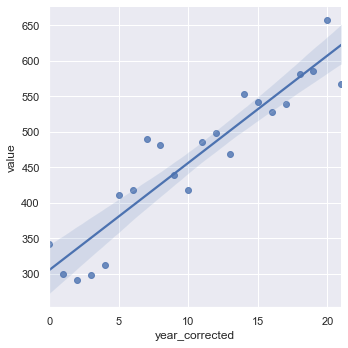

In [270]:
sns.lmplot(data=df_ml, x='year_corrected', y='value')

In [271]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

-0.5278771688206809


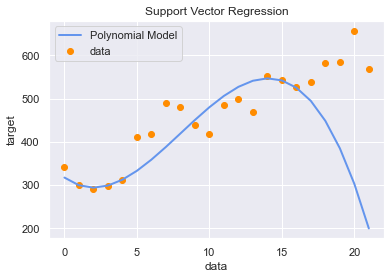

In [272]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

## Defence

In [273]:
df_ml2=budget_grouped.query('country=="United Kingdom" & program_type=="Defence"').reset_index()
df_ml2.head()

,index,country,program_type,year_corrected,value
0,1704,United Kingdom,Defence,0,166.327701
1,1705,United Kingdom,Defence,1,86.544586
2,1706,United Kingdom,Defence,2,97.026582
3,1707,United Kingdom,Defence,3,105.212200
4,1708,United Kingdom,Defence,4,61.390562


In [274]:
X,y = df_ml2[['year_corrected']], df_ml2.value

In [275]:
lm=LinearRegression()
lm.fit(X, y)
lm.score(X,y)

0.4989940404781499

In [276]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

0.10914497625164965


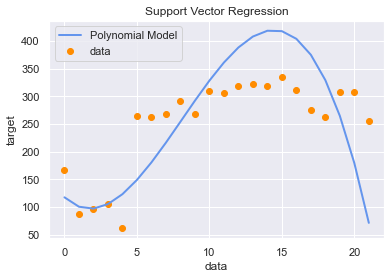

In [277]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

# United States
## Civil

### Select the X and y

In [278]:
df_ml=budget_grouped.query('country=="United States" & program_type=="Civil"').reset_index()
df_ml.head()

,index,country,program_type,year_corrected,value
0,1726,United States,Civil,0,12459.000
1,1727,United States,Civil,1,12521.000
2,1728,United States,Civil,2,13736.100
3,1729,United States,Civil,3,14403.975
4,1730,United States,Civil,4,14809.542


In [279]:
X,y = df_ml[['year_corrected']], df_ml.value

### Linear Regression

In [280]:
lm=LinearRegression()
lm.fit(X, y)
y_pred1 = lm.predict(X)
lm.score(X,y)

0.9477618237386819

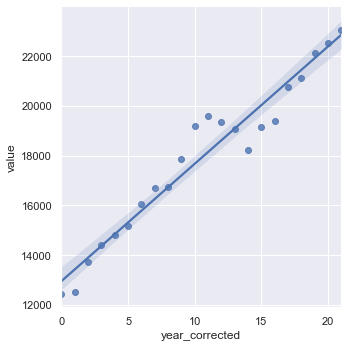

In [281]:
sns.lmplot(data=df_ml, x='year_corrected', y='value')

### SVR with polynomial

In [282]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

0.9589296248364616


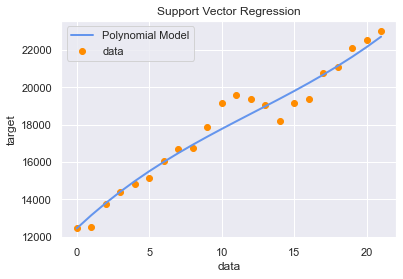

In [283]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

## Defence

In [284]:
df_ml2=budget_grouped.query('country=="United States" & program_type=="Defence"').reset_index()
df_ml2.head()

,index,country,program_type,year_corrected,value
0,1748,United States,Defence,0,13955.571
1,1749,United States,Defence,1,14627.047
2,1750,United States,Defence,2,14790.600
3,1751,United States,Defence,3,16419.147
4,1752,United States,Defence,4,18526.862


In [285]:
X,y = df_ml2[['year_corrected']], df_ml2.value

In [286]:
lm=LinearRegression()
lm.fit(X, y)
lm.score(X,y)

0.04207622543338663

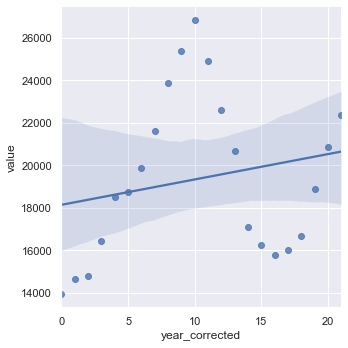

In [287]:
sns.lmplot(data=df_ml2, x='year_corrected', y='value')

### SVR with polynomial

In [288]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

0.414159347349225


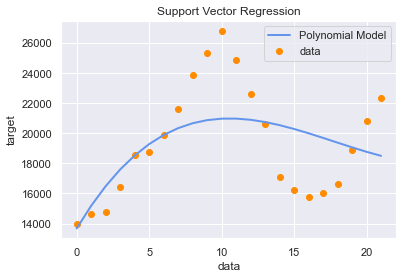

In [289]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

# China
## Civil

### Select the X and y

In [290]:
df_ml=budget_grouped.query('country=="China" & program_type=="Civil"').reset_index()
df_ml.head()

,index,country,program_type,year_corrected,value
0,311,China,Civil,0,387.301467
1,312,China,Civil,1,441.515850
2,313,China,Civil,2,487.930887
3,314,China,Civil,3,487.927145
4,315,China,Civil,4,541.549433


In [291]:
X,y = df_ml[['year_corrected']], df_ml.value

### Linear Regression

In [292]:
lm=LinearRegression()
lm.fit(X, y)
y_pred1 = lm.predict(X)
lm.score(X,y)

0.9385446983314762

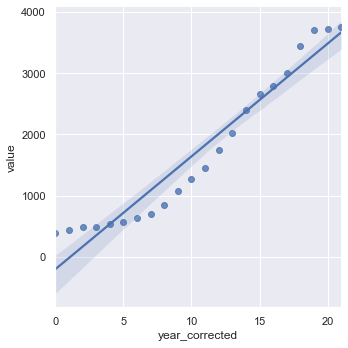

In [293]:
sns.lmplot(data=df_ml, x='year_corrected', y='value')

### SVR with polynomial

In [294]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

0.992574363801033


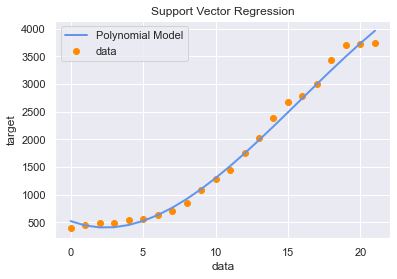

In [295]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

## Defence

In [296]:
df_ml2=budget_grouped.query('country=="China" & program_type=="Defence"').reset_index()
df_ml2.head()

,index,country,program_type,year_corrected,value
0,333,China,Defence,0,286.452461
1,334,China,Defence,1,327.114247
2,335,China,Defence,2,361.923527
3,336,China,Defence,3,361.947418
4,337,China,Defence,4,410.208213


In [297]:
X,y = df_ml2[['year_corrected']], df_ml2.value

In [298]:
lm=LinearRegression()
lm.fit(X, y)
lm.score(X,y)

0.9491383269193172

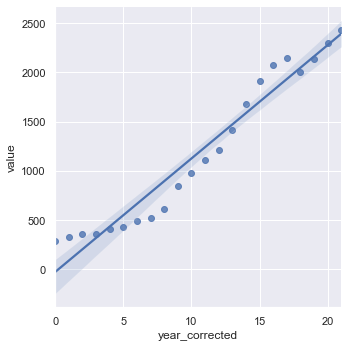

In [299]:
sns.lmplot(data=df_ml2, x='year_corrected', y='value')

In [300]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

0.9826964475327881


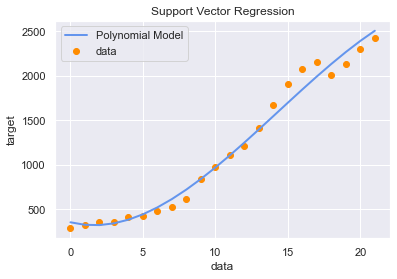

In [301]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

# India
## Civil

### Select the X and y

In [302]:
df_ml=budget_grouped.query('country=="India" & program_type=="Civil"').reset_index()
df_ml.head()

,index,country,program_type,year_corrected,value
0,711,India,Civil,0,400.385600
1,712,India,Civil,1,425.595500
2,713,India,Civil,2,404.771600
3,714,India,Civil,3,445.131825
4,715,India,Civil,4,488.179408


In [303]:
X,y = df_ml[['year_corrected']], df_ml.value

### Linear Regression

In [304]:
lm=LinearRegression()
lm.fit(X, y)
y_pred1 = lm.predict(X)
lm.score(X,y)

0.8307823910616947

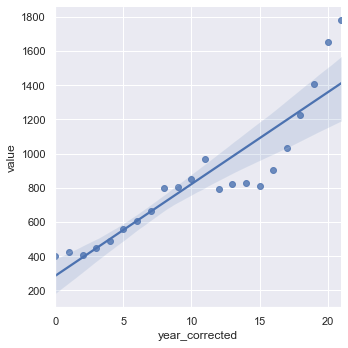

In [305]:
sns.lmplot(data=df_ml, x='year_corrected', y='value')

In [306]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

0.845808946549752


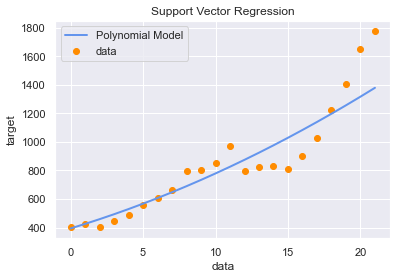

In [307]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

## Defence

In [308]:
df_ml2=budget_grouped.query('country=="India" & program_type=="Defence"').reset_index()
df_ml2.head()

,index,country,program_type,year_corrected,value
0,733,India,Defence,9,16.695093
1,734,India,Defence,10,24.951608
2,735,India,Defence,11,67.072105
3,736,India,Defence,12,73.348450
4,737,India,Defence,13,90.053536


In [309]:
X,y = df_ml2[['year_corrected']], df_ml2.value

In [310]:
lm=LinearRegression()
lm.fit(X, y)
lm.score(X,y)

0.3621594683976067

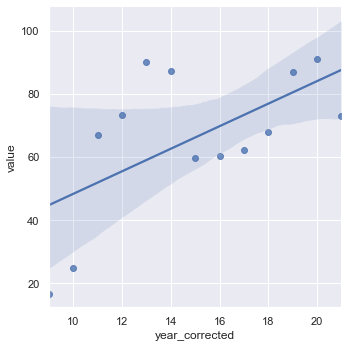

In [311]:
sns.lmplot(data=df_ml2, x='year_corrected', y='value')

### SVR with polynomial

In [312]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

-26.998179349722264


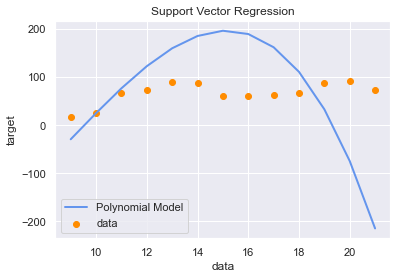

In [313]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

# Japan
## Civil

### Select the X and y

In [314]:
df_ml=budget_grouped.query('country=="Japan" & program_type=="Civil"').reset_index()
df_ml.head()

,index,country,program_type,year_corrected,value
0,891,Japan,Civil,0,2290.502
1,892,Japan,Civil,1,2405.376
2,893,Japan,Civil,2,1754.296
3,894,Japan,Civil,3,1634.400
4,895,Japan,Civil,4,1736.640


In [315]:
X,y = df_ml[['year_corrected']], df_ml.value

### Linear Regression

In [316]:
lm=LinearRegression()
lm.fit(X, y)
y_pred1 = lm.predict(X)
lm.score(X,y)

0.018877329666188825

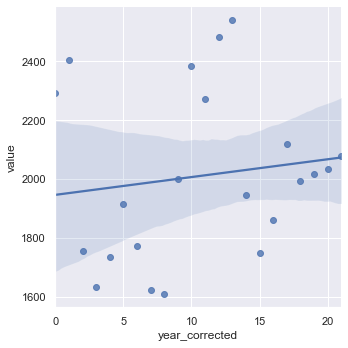

In [317]:
sns.lmplot(data=df_ml, x='year_corrected', y='value')

### SVR with polynomial

In [318]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

-0.3790968163988273


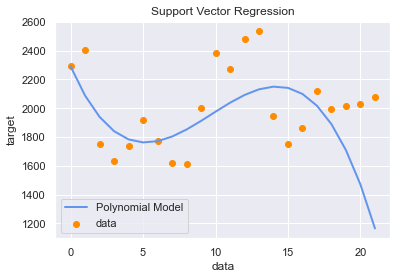

In [319]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

## Defence

In [320]:
df_ml2=budget_grouped.query('country=="Japan" & program_type=="Defence"').reset_index()
df_ml2.head()

,index,country,program_type,year_corrected,value
0,913,Japan,Defence,0,326.71
1,914,Japan,Defence,1,649.60
2,915,Japan,Defence,2,683.92
3,916,Japan,Defence,3,592.00
4,917,Japan,Defence,4,604.80


In [321]:
X,y = df_ml2[['year_corrected']], df_ml2.value

In [322]:
lm=LinearRegression()
lm.fit(X, y)
lm.score(X,y)

0.48434678457727454

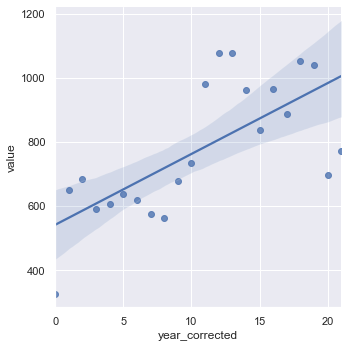

In [323]:
sns.lmplot(data=df_ml2, x='year_corrected', y='value')

### SVR with polynomial

In [324]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

0.2760110473588788


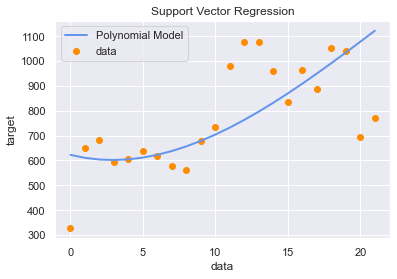

In [325]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

# Russia
## Civil

### Select the X and y

In [366]:
df_ml=budget_grouped.query('country=="Russian Federation" & program_type=="Civil"').reset_index()
df_ml.head()

,index,country,program_type,year_corrected,value
0,1333,Russian Federation,Civil,0,138.099206
1,1334,Russian Federation,Civil,1,186.079870
2,1335,Russian Federation,Civil,2,224.448859
3,1336,Russian Federation,Civil,3,360.486981
4,1337,Russian Federation,Civil,4,345.871867


In [367]:
X,y = df_ml[['year_corrected']], df_ml.value

### Linear Regression

In [368]:
lm=LinearRegression()
lm.fit(X, y)
y_pred1 = lm.predict(X)
lm.score(X,y)

0.4194701341131182

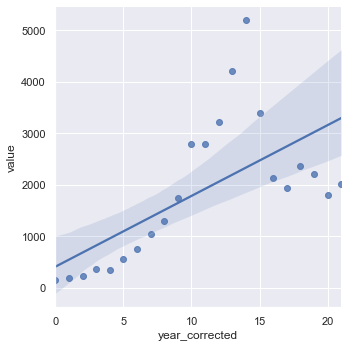

In [369]:
sns.lmplot(data=df_ml, x='year_corrected', y='value')

### SVR with polynomial

In [370]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

0.7391607322601221


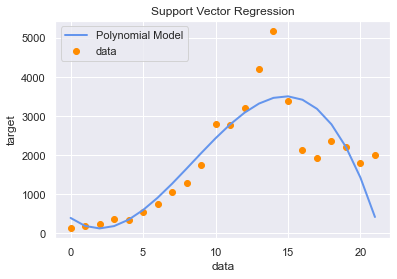

In [371]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

## Defence

In [352]:
df_ml2=budget_grouped.query('country=="Russian Federation" & program_type=="Defence"').reset_index()
df_ml2.head()

,index,country,program_type,year_corrected,value
0,1355,Russian Federation,Defence,2,224.442019
1,1356,Russian Federation,Defence,3,360.515665
2,1357,Russian Federation,Defence,4,345.866292
3,1358,Russian Federation,Defence,5,551.013116
4,1359,Russian Federation,Defence,6,749.286551


In [353]:
X,y = df_ml2[['year_corrected']], df_ml2.value

### Linear Regression

In [354]:
lm=LinearRegression()
lm.fit(X, y)
lm.score(X,y)

0.3195794959210998

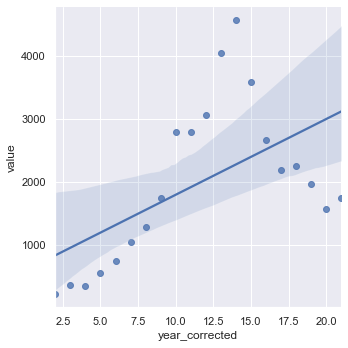

In [355]:
sns.lmplot(data=df_ml2, x='year_corrected', y='value')

### SVR with polynomial

In [356]:
svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_pred = svr.fit(X,y).predict(X)
print(svr.score(X, y))

0.7798077542429271


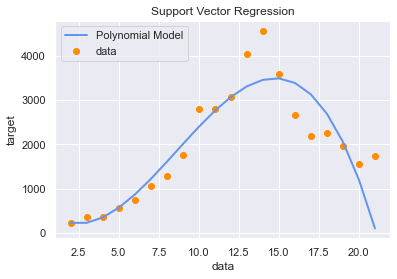

In [357]:
#Plotting of results
lw = 2
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", lw=lw, label="Polynomial Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()